### Given the image “strawberries.tif”. Process the image and show only edible part of strawberry.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Strawberry Detection and Color Overlay

- This code segment performs strawberry detection in an image by isolating red regions, identifying the largest strawberry contour, and overlaying detected strawberries with a specified color, then displaying the processed images.

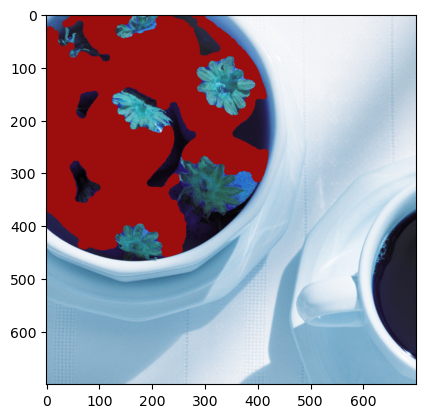

In [5]:
# replaces the masked area in an image with a specified color.
def remove_background(mask, image, color):
    # Create a copy of the original image
    result = image.copy()
    # Set the color channels of the masked area to the desired color
    result[mask != 0] = color
    return result

# identifies the largest contour in a binary image and creates a mask around it.
def find_biggest_contour(image):
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    biggest_contour = contours[0]
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [biggest_contour], -1, 255, thickness=cv2.FILLED)
    return biggest_contour, mask

#detects strawberries in an image by filtering for red pixels, applying morphological operations to clean the mask, 
#and overlaying the detected strawberries with a specified color
def find_strawberry(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize the image to a maximum dimension of 700 pixels
    max_dimension = max(image.shape)
    scale = 700 / max_dimension
    image = cv2.resize(image, None, fx=scale, fy=scale)
    # Apply Gaussian blur to the image to reduce noise
    image_blur = cv2.GaussianBlur(image, (7, 7), 0)
    # Convert the blurred image to HSV color space
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    min_red = np.array([0, 100, 80])
    max_red = np.array([10, 256, 256])
    # Create a binary mask for pixels within the red color range
    mask1 = cv2.inRange(image_blur_hsv, min_red, max_red)
    min_red2 = np.array([170, 100, 80])
    max_red2 = np.array([180, 256, 256])
    # Create another binary mask for pixels within the wraparound range of red color
    mask2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)
    mask = mask1 + mask2
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask_clean = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)
    big_strawberry_contour, mask_strawberries = find_biggest_contour(mask_clean)
    #overlay = overlay_mask(mask_clean, image)
    desired_color = (13, 13, 156)  # BGR color format for red
    overlay = remove_background(mask_clean, image,desired_color)    
    return overlay

image = cv2.imread('strawberries.tif')
result = find_strawberry(image)

# Display the result
result_rgb = cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB)
#plt.imshow(image)
plt.imshow(result_rgb)
plt.show()
